In [1]:
# Importing libraries and basic overview.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
restaurant_names = pd.read_csv('/Users/ansh/Downloads/Data_Science_Projects/Restaurant_Recommender_System_with_Python/DataSet/Restaurant names and Metadata.csv')
restaurant_reviews = pd.read_csv('/Users/ansh/Downloads/Data_Science_Projects/Restaurant_Recommender_System_with_Python/DataSet/Restaurant reviews.csv')

In [4]:
restaurant_names.head(6)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,"1,500","Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."


In [5]:
restaurant_reviews.head(6)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0


In [6]:
restaurant_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
restaurant_names.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [8]:
restaurant_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [9]:
restaurant_reviews.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

In [10]:
# Merging two data sets - I will merge these two data sets. After the merging I will have a data set with individual customer reviews and ratings for the restaurants.

In [11]:
# Renaming the restaurant name column with the same value as in the other data set:
restaurant_reviews = restaurant_reviews.rename(columns={'Restaurant': 'Name'})

# Merging the two data sets:
df = pd.merge(restaurant_reviews, restaurant_names, how='left', on='Name')

# Dropping the columns which I am not going to use:
df.drop(['Reviewer', 'Time', 'Pictures', 'Links', 'Collections'], axis=1, inplace=True)
df.head()

,Name,Review,Rating,Metadata,Cost,Cuisines,Timings
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


In [12]:
# Preparing Cost and Rating Columns

In [13]:
# Changing cost and rating columns data types:
df['Cost'] = df['Cost'].str.replace(',', '').astype(int)
df['Rating'] = df['Rating'].str.replace('Like', '1').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      10000 non-null  object 
 1   Review    9955 non-null   object 
 2   Rating    9962 non-null   float64
 3   Metadata  9962 non-null   object 
 4   Cost      10000 non-null  int64  
 5   Cuisines  10000 non-null  object 
 6   Timings   9900 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 625.0+ KB


In [14]:
# Handling Missing Values

In [15]:
print('No of data inputs:', len(df))
print('No of NaN values for each column:')
print(df.isnull().sum())

No of data inputs: 10000
No of NaN values for each column:
Name          0
Review       45
Rating       38
Metadata     38
Cost          0
Cuisines      0
Timings     100
dtype: int64


In [16]:
# Examine missing Rating values:
df['Name'][df['Rating'].isnull() == True].value_counts()

American Wild Wings    23
Arena Eleven           15
Name: Name, dtype: int64

In [17]:
print('Mean of Rating for American Wild Wings: ', df['Rating'][df['Name'] == 'American Wild Wings'].mean())
print('Mean of Rating for Arena Eleven: ', df['Rating'][df['Name'] == 'Arena Eleven'].mean())
print('Overall Mean of Ratings: ', df['Rating'].mean())

Mean of Rating for American Wild Wings:  3.9740259740259742
Mean of Rating for Arena Eleven:  4.117647058823529
Overall Mean of Ratings:  3.6007829753061635


In [18]:
df['Rating'].fillna(4, inplace=True)

# Changing NaN reviews by '-'
df['Review'] = df['Review'].fillna('-')
df.isnull().sum()

Name          0
Review        0
Rating        0
Metadata     38
Cost          0
Cuisines      0
Timings     100
dtype: int64

In [19]:
# Separating Metadata (Reviews and Followers)

In [20]:
# Filling missing values:
df['Metadata'].fillna('0 Review , 0 Follower', inplace=True)

# Standardizing strings
df['Metadata'] = df['Metadata'].str.replace('Reviews', 'Review')
df['Metadata'] = df['Metadata'].str.replace('Followers', 'Follower')

df['Metadata'][df['Metadata'].str.endswith('w')] = df['Metadata'][df['Metadata'].str.endswith('w')] + ' , - Follower'

# Splitting into two columns
df[['Reviews', 'Followers']] = df['Metadata'].str.split(' , ', expand=True)

# Erasing wording from the columns
df['Reviews'] = df['Reviews'].str.replace('Review', '')
df['Reviews'] = df['Reviews'].str.replace('Posts', '')
df['Reviews'] = df['Reviews'].str.replace('Post', '')

df['Followers'] = df['Followers'].str.replace('Follower', '')
df['Followers'] = df['Followers'].str.replace('-', '0')

# Changing str values to integers
df[['Reviews', 'Followers']] = df[['Reviews', 'Followers']].astype(int)

# Dropping the initial column
df.drop(['Metadata'], axis=1, inplace=True)

# Sorting restaurants with their names and costs
df = df.sort_values(['Name', 'Cost'], ascending=False).reset_index()
df.drop('index', axis=1, inplace=True)

In [21]:
df.head()

,Name,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers
0,eat.fit,I had ordered gobi methi paratha.. it was ok. ...,3.0,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,1,1
1,eat.fit,Food was good but it was all leaking from the ...,3.0,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,1,0
2,eat.fit,"Intially, yes,the food was really good they we...",3.0,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,9,0
3,eat.fit,Hyderabad's most worst and ugliest biryani i h...,1.0,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,1,1
4,eat.fit,Very good at quality guys..even packaging is e...,4.0,500,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM,10,1


In [22]:
# Creating New Features (Mean of Ratings, Reviews, and Followers)

In [23]:
# Feature Scaling

In [24]:
restaurants = list(df['Name'].unique())
df['Mean Rating'] = 0
df['Mean Reviews'] = 0
df['Mean Followers'] = 0

for i in range(len(restaurants)):
    df['Mean Rating'][df['Name'] == restaurants[i]] = df['Rating'][df['Name'] == restaurants[i]].mean()
    df['Mean Reviews'][df['Name'] == restaurants[i]] = df['Reviews'][df['Name'] == restaurants[i]].mean()
    df['Mean Followers'][df['Name'] == restaurants[i]] = df['Followers'][df['Name'] == restaurants[i]].mean()

In [25]:
df.sample(5)

,Name,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers,Mean Rating,Mean Reviews,Mean Followers
1730,Tempteys,The Caramel Brownie was one of my favorites. T...,4.0,350,"Desserts, Beverages",11:30 AM to 1 AM,82,1500,3.850,35.93,264.78
4412,Labonel,Their atmosphere is beautiful and the vibe is ...,5.0,1000,"Bakery, Desserts","11 AM to 8 PM (Mon-Sat), Sun Closed",6,6,3.915,66.28,292.42
3195,Pista House,the top layer of the cake was of homey was not...,4.0,1000,"Bakery, North Indian, Mughlai, Juices, Chinese",11 AM to 12 Midnight,9,8,3.230,54.29,510.68
5141,KS Bakers,A good place to hang out for a casual evening ...,4.0,200,"Bakery, Desserts, Fast Food",9 AM to 10 PM,60,186,3.965,41.81,151.37
5939,Hitech Bawarchi Food Zone,good delivery in time,5.0,500,"Biryani, North Indian, Chinese",12 Noon to 11 PM,1,36,3.050,5.74,139.35


In [26]:
# Feature Scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,5))

df[['Mean Rating', 'Mean Reviews', 'Mean Followers']] = scaler.fit_transform(df[['Mean Rating', 'Mean Reviews', 'Mean Followers']]).round(2)

df.sample(3)

,Name,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers,Mean Rating,Mean Reviews,Mean Followers
7591,Delhi-39,too late to serve,3.0,600,"North Indian, Chinese",11am to 11pm (Mon-Sun),1,1,1.93,1.22,1.05
9908,10 Downing Street,"Reading the reviews we visited this place, how...",1.0,1900,"North Indian, Chinese, Continental",12 Noon to 12 Midnight,2,0,3.26,3.35,2.90
5453,Hyper Local,Hyper Local is the perfect place for a Saturda...,4.0,1000,"American, Chinese, North Indian, Kebab, South ...",12 Noon to 12 Midnight,5,3,3.00,2.32,2.12


In [28]:
# Text Preprocessig and Cleaning

In [29]:
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# 5 examples of these columns before text processing:
df[['Review', 'Cuisines']].sample(5)

,Review,Cuisines
190,I visited this place once and oh my oh my lemm...,"North Eastern, Momos"
7503,Went today on a Relaxed Late Lunch! Decided to...,"North Indian, Chinese"
8320,"Beautiful, cozy and classy at the same time, t...","Chinese, Continental, Kebab, European, South I..."
9130,The food here was ok. But the service was wors...,Continental
9926,Great ambience and decent brew beer. But there...,"North Indian, Chinese, Continental"


In [31]:
# Define symbols to be replaced by space
replace_space = re.compile('[/(){}\[\]\|@,;]')
# Define symbols to be removed
remove_symbols = re.compile('[^0-9a-z #+_]')
# Define stopwords
stopwords = set(stopwords.words('english'))

def text_preprocessing(text):
    # Lowercase all the letters
    text = text.lower()
    
    # Replace these symbols with space
    text = replace_space.sub(' ', text)
    
    # Remove these symbols
    text = remove_symbols.sub('', text)
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords)
    
    return text

In [32]:
df['Review'] = df['Review'].apply(text_preprocessing)
df['Cuisines'] = df['Cuisines'].apply(text_preprocessing)

In [33]:
# Columns after processed:
df[['Review','Cuisines']].sample(5)

,Review,Cuisines
6092,good,north indian chinese biryani
1446,kindly try putting stuffing waffles ordered tw...,american wraps desserts
1006,heard good things place wanted give try went s...,bakery
5334,bad service food good took lot time clearing p...,north indian japanese italian salad sushi
1044,got good baked items like bread bagels puff pa...,bakery


In [34]:
# EDA - Analysing Restaurants and Popularities ( Exploratory Data Analysis )

In [35]:
# RESTAURANT NAMES:
restaurant_names = list(df['Name'].unique())
restaurant_names

['eat.fit',
 "Zing's Northeast Kitchen",
 'Zega - Sheraton Hyderabad Hotel',
 'Yum Yum Tree - The Arabian Food Court',
 'Urban Asia - Kitchen & Bar',
 'Ulavacharu',
 "Udipi's Upahar",
 'Triptify',
 'Tiki Shack',
 'The Tilt Bar Republic',
 'The Old Madras Baking Company',
 'The Lal Street - Bar Exchange',
 'The Indi Grill',
 'The Glass Onion',
 'The Foodie Monster Kitchen',
 "The Fisherman's Wharf",
 'The Chocolate Room',
 'Tempteys',
 'Tandoori Food Works',
 'T Grill',
 'Squeeze @ The Lime',
 'Shree Santosh Dhaba Family Restaurant',
 'Shanghai Chef 2',
 'Shah Ghouse Spl Shawarma',
 'Shah Ghouse Hotel & Restaurant',
 "Sardarji's Chaats & More",
 'SKYHY',
 'Royal Spicy Restaurant',
 'Prism Club & Kitchen',
 'PourHouse7',
 'Pot Pourri',
 'Pista House',
 'Paradise',
 'Pakwaan Grand',
 'Owm Nom Nom',
 'Over The Moon Brew Company',
 'Olive Garden',
 'NorFest - The Dhaba',
 'Mustang Terrace Lounge',
 'Momos Delight',
 'Mohammedia Shawarma',
 'Mazzo - Marriott Executive Apartments',
 'Mathura 

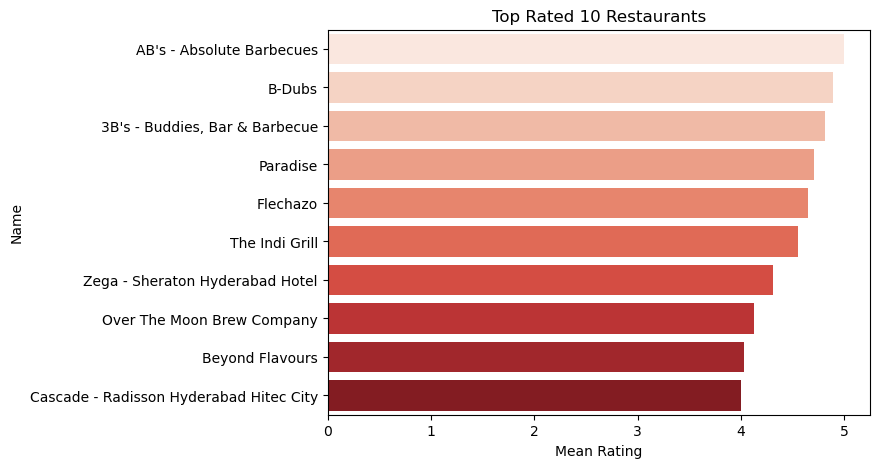

In [36]:
df_rating = df.drop_duplicates(subset='Name')
df_rating = df_rating.sort_values(by='Mean Rating', ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(data=df_rating, x='Mean Rating', y='Name', palette='Reds')
plt.title('Top Rated 10 Restaurants');

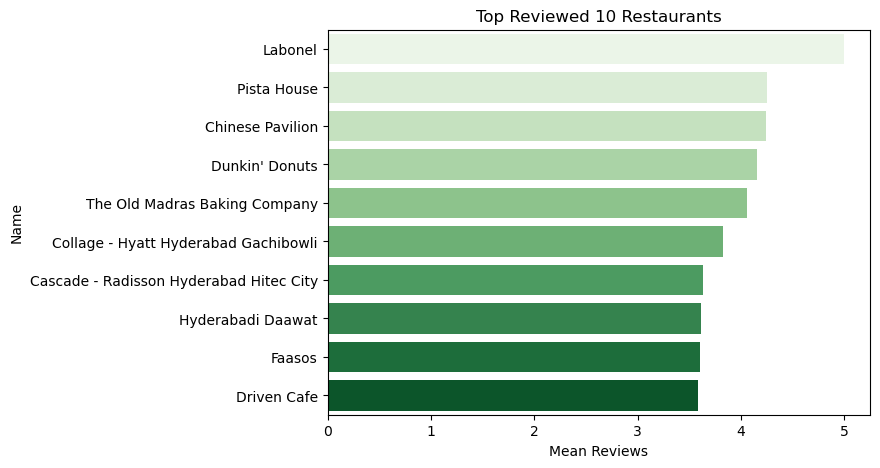

In [37]:
df_reviews = df.drop_duplicates(subset='Name')
df_reviews = df_reviews.sort_values(by='Mean Reviews', ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(data=df_reviews, x='Mean Reviews', y='Name', palette='Greens')
plt.title('Top Reviewed 10 Restaurants');

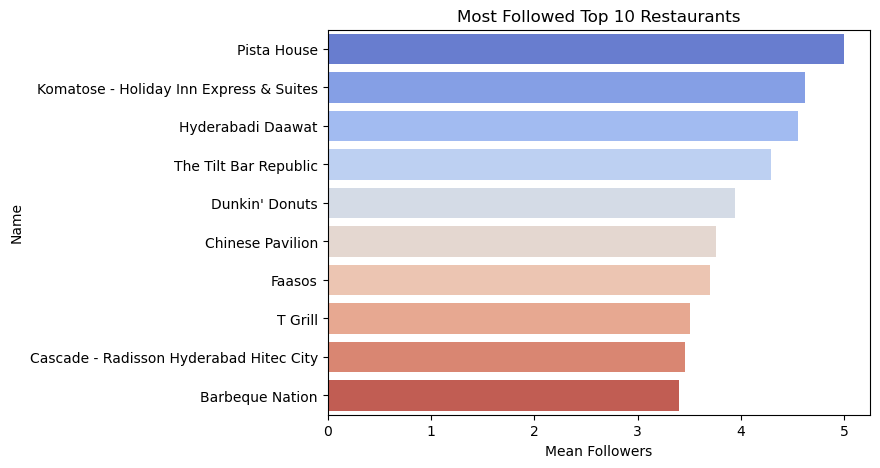

In [38]:
df_followers = df.drop_duplicates(subset='Name')
df_followers = df_followers.sort_values(by='Mean Followers', ascending=False).head(10)

plt.figure(figsize=(7,5))
sns.barplot(data=df_followers, x='Mean Followers', y='Name', palette='coolwarm')
plt.title('Most Followed Top 10 Restaurants');

In [39]:
# EDA - Word Frequency Distribution:

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(column, top_nu_of_words, nu_of_word):
    # Initialize the CountVectorizer with the specified ngram range and English stop words
    vec = CountVectorizer(ngram_range=nu_of_word, stop_words='english')
    
    # Fit the vectorizer to the text data and transform it into a bag-of-words representation
    bag_of_words = vec.fit_transform(column)
    
    # Sum the occurrences of each word (or n-gram) across all documents
    sum_words = bag_of_words.sum(axis=0)
    
    # Create a list of tuples (word, frequency) for each word in the vocabulary
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # Sort the list of words by frequency in descending order
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Return the top n words (or n-grams) based on the specified number
    return words_freq[:top_nu_of_words]

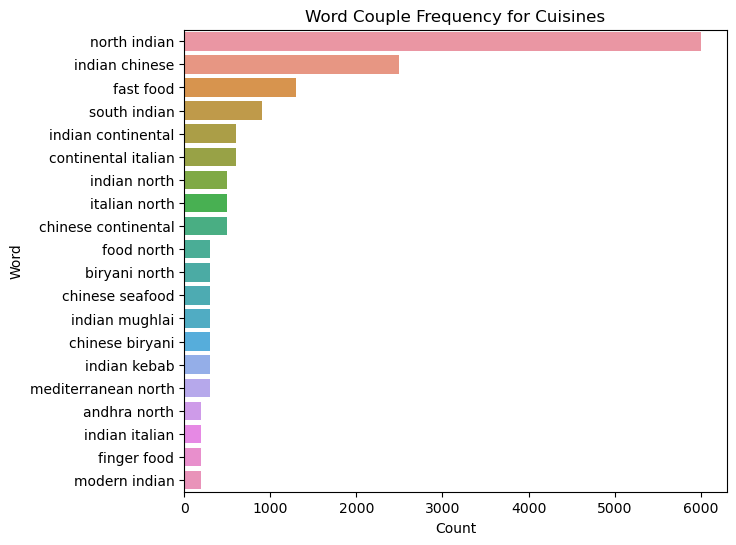

In [41]:
# Top 20 two word frequencies for Cuisines
list1 = get_top_words(df['Cuisines'], 20, (2,2))

df_words1 = pd.DataFrame(list1, columns=['Word', 'Count'])

plt.figure(figsize=(7,6))
sns.barplot(data=df_words1, x='Count', y='Word')
plt.title('Word Couple Frequency for Cuisines');

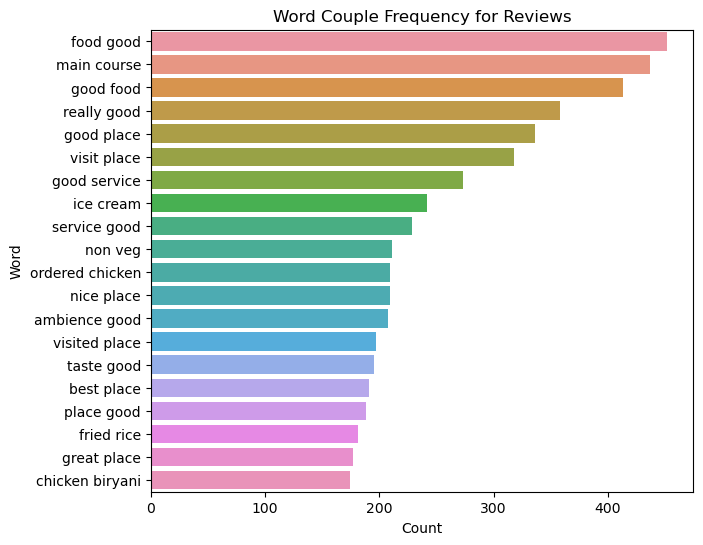

In [42]:
# Top 20 two word frequencies for Reviews
list2 = get_top_words(df['Review'], 20, (2,2))

df_words2 = pd.DataFrame(list2, columns=['Word', 'Count'])

plt.figure(figsize=(7,6))
sns.barplot(data=df_words2, x='Count', y='Word')
plt.title('Word Couple Frequency for Reviews');

In [43]:
# CONTENT BASE RECOMMENDER SYSTEM

In [44]:
# Changing data set index by restaurant name
df.set_index('Name', inplace=True)

# Saving indexes in a series
indices = pd.Series(df.index)

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Review'])

# Calculating cosine similarities
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [45]:
# Creating the Recommender System:

In [46]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top 10 restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['Cuisines', 'Mean Rating', 'Cost', 'Timings'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df[['Cuisines','Mean Rating', 'Cost', 'Timings']][df.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['Cuisines','Mean Rating', 'Cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

In [47]:
# HERE IS A RANDOM RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df[df.index == 'Hyderabadi Daawat'].head(1)

,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers,Mean Rating,Mean Reviews,Mean Followers
Name,,,,,,,,,,
Hyderabadi Daawat,ordered veg biryani hyderabad daawat taste ave...,3.0,600,hyderabadi chinese mughlai,12:30pm to 11:30pm (Mon-Sun),5,0,3.31,3.61,4.55


In [48]:
# LET'S SEE WHAT ARE WE GOING TO BE RECOMMENDED:
recommend('Hyderabadi Daawat')

TOP 10 RESTAURANTS LIKE Hyderabadi Daawat WITH SIMILAR REVIEWS: 


,Cuisines,Mean Rating,Cost,Timings
Cream Stone,ice cream desserts,3.33,350,"10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."
Hyderabadi Daawat,hyderabadi chinese mughlai,3.31,600,12:30pm to 11:30pm (Mon-Sun)
Hyper Local,american chinese north indian kebab south indian,3.00,1000,12 Noon to 12 Midnight
Triptify,north indian,2.85,400,11 AM to 11 PM
Owm Nom Nom,chinese biryani andhra north indian,2.44,900,12Noon to 11:30PM (Mon-Sun)
Tandoori Food Works,north indian burger kebab,2.40,500,"12noon to 12midnight (Mon, Tue, Wed, Thu, Sun)..."
Sardarji's Chaats & More,street food north indian fast food,2.37,400,"12 Noon to 3:30 PM, 7 PM to 10:30 PM"
Pista House,bakery north indian mughlai juices chinese,2.34,1000,11 AM to 12 Midnight
eat.fit,healthy food north indian continental south in...,2.29,500,7 AM to 10 PM
T Grill,north indian andhra biryani chinese,2.24,700,"12:30 PM to 3:30 PM, 7 PM to 11 PM"


In [49]:
# HERE IS A BAKERY. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df[df.index == 'Labonel'].head(1)

,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers,Mean Rating,Mean Reviews,Mean Followers
Name,,,,,,,,,,
Labonel,let make simple brownies die huge variety cupc...,4.0,1000,bakery desserts,"11 AM to 8 PM (Mon-Sat), Sun Closed",18,86,3.44,5.0,3.27


In [50]:
# LET'S SEE WHAT ARE WE GOING TO BE RECOMMENDED:
recommend('Labonel')

TOP 3 RESTAURANTS LIKE Labonel WITH SIMILAR REVIEWS: 


,Cuisines,Mean Rating,Cost,Timings
Cream Stone,ice cream desserts,3.33,350,"10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."
Karachi Cafe,cafe desserts fast food,3.12,600,10 AM to 10 PM
The Old Madras Baking Company,bakery,2.92,350,7 AM to 11 PM


In [54]:
# HERE IS A MEDITERRANEAN / NORTH INDIAN / KEBAB / BBQ RESTAURANT. LET'S SEE THE DETAILS ABOUT THIS RESTAURANT:
df[df.index == 'Karachi Cafe'].sample(1)

,Review,Rating,Cost,Cuisines,Timings,Reviews,Followers,Mean Rating,Mean Reviews,Mean Followers
Name,,,,,,,,,,
Karachi Cafe,interiors ambience lovely perfect old bollywoo...,5.0,600,cafe desserts fast food,10 AM to 10 PM,22,22,3.12,3.49,2.68


In [55]:
# LET'S SEE WHAT ARE WE GOING TO BE RECOMMENDED:
recommend('Karachi Cafe')

TOP 10 RESTAURANTS LIKE Karachi Cafe WITH SIMILAR REVIEWS: 


,Cuisines,Mean Rating,Cost,Timings
B-Dubs,american,4.89,1600,"11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11a..."
Cascade - Radisson Hyderabad Hitec City,north indian italian continental asian,4.00,1800,24 Hours
Driven Cafe,cafe fast food beverages,3.17,600,4 AM to 12 Midnight
Karachi Cafe,cafe desserts fast food,3.12,600,10 AM to 10 PM
The Old Madras Baking Company,bakery,2.92,350,7 AM to 11 PM
Cafe Eclat,cafe bakery,2.92,700,8 AM to 11:30 PM
The Foodie Monster Kitchen,american wraps desserts,2.90,500,7 AM to 1 AM
Shah Ghouse Spl Shawarma,lebanese,2.66,300,12 Noon to 12 Midnight
Mustang Terrace Lounge,mexican italian north indian chinese salad,2.47,1300,"12 Noon to 11:30 PM (Mon-Wed), 12 Noon to 1 AM..."
Hunger Maggi Point,fast food,2.16,200,4:30 PM to 5:30 AM


In [56]:
recommend('Hunger Maggi Point')

TOP 8 RESTAURANTS LIKE Hunger Maggi Point WITH SIMILAR REVIEWS: 


,Cuisines,Mean Rating,Cost,Timings
Banana Leaf Multicuisine Restaurant,biryani south indian north indian chinese andhra,3.08,700,"12:30 PM to 3:30 PM, 7 PM to 10:40 PM"
Gal Punjab Di,north indian continental,2.95,800,"11:55 AM to 4 PM, 7 PM to 11:15 PM"
Triptify,north indian,2.85,400,11 AM to 11 PM
Aromas@11SIX,north indian chinese mughlai biryani,2.71,750,11:30 AM to 12 Midnight
Owm Nom Nom,chinese biryani andhra north indian,2.44,900,12Noon to 11:30PM (Mon-Sun)
T Grill,north indian andhra biryani chinese,2.24,700,"12:30 PM to 3:30 PM, 7 PM to 11 PM"
Mohammedia Shawarma,street food arabian,1.95,150,1 PM to 1 AM
KFC,burger fast food,1.73,500,11 AM to 11 PM
